In [1]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:87: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: invalid value encountered in sqrt
  2*T/(3*np

In [3]:
# 0.3 eV in MeV is 0.3 * 10 ^ -6 MeV 
# In powers of ten this is equal to log(0.3*10^-6) = - 6.5
Tlist = np.logspace(1,-3,num=1000)
h = 0.67
Omegab = 0.05
eta = 5.5 * 10**(-10)*h**2*Omegab/0.02
BH = 13.6 * 10 ** (-6)
me = 0.511
RZetaThree = 1.202056903

In [ ]:
Tlist = np.logspace(2.5,-3,num=1000)
#nlist = np.zeros(1000)
def mu_e_relative(T):
    return fsolve(lambda mu: -2*eta*RZetaThree/np.pi**2+(1/(3*np.pi**2))*(np.pi**2*mu/T+mu**3/T**3),1)

def mu_e_nonrelative(T):
    return fsolve(lambda mu: -2*eta*RZetaThree/np.pi**2+(me*T/(2*np.pi))**(3/2)*np.exp(-me/T)*np.sinh(mu/T),1)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_40783/3707992628.py:7: RuntimeWarning: overflow encountered in sinh
  return fsolve(lambda mu: -2*eta*RZetaThree/np.pi**2+(me*T/(2*np.pi))**(3/2)*np.exp(-me/T)*np.sinh(mu/T),1)


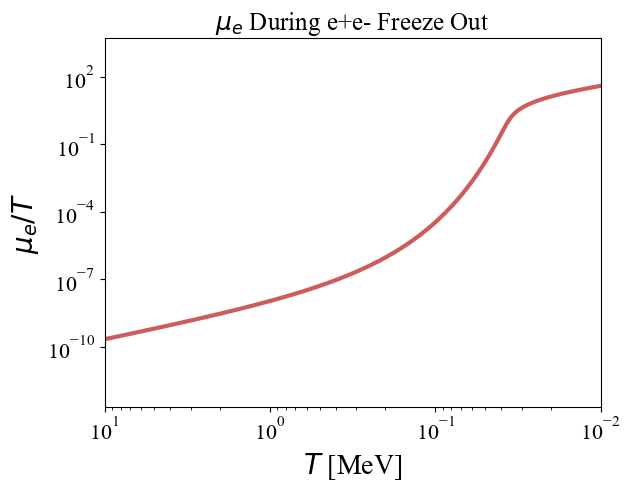

In [ ]:
f, ax = plt.subplots()

ax.loglog(Tlist,np.array([mu_e_nonrelative(i)/i for i in Tlist]),lw=3,c='indianred',alpha = 1,label = '$n_b$')

ax.set_ylabel(r'$\mu_e/T$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$\mu_e$ During e+e- Freeze Out', fontsize=18)
ax.set_xlim([10,0.01])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

In [ ]:
print(mu_e_nonrelative(0.0015))

[0.58584989]


/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


## Baryon and Electron Number Densities

In [ ]:
def nb(T):
    return eta * 2 * RZetaThree * T**3

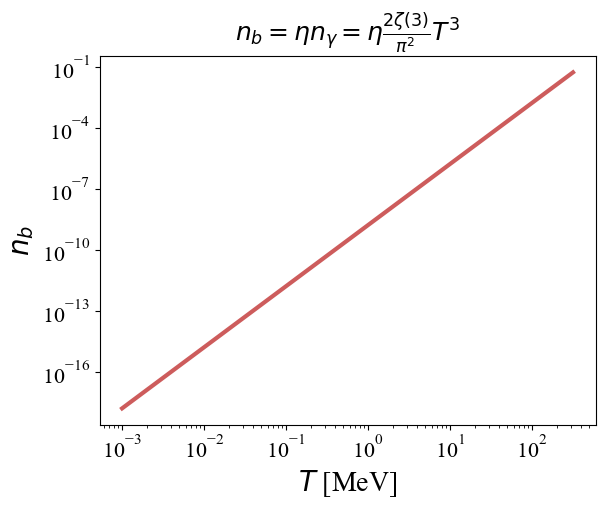

In [ ]:
f, ax = plt.subplots()

ax.loglog(Tlist, [nb(i) for i in Tlist],lw=3,c='indianred',alpha = 1,label = '$n_b$')

ax.set_ylabel(r'$n_b$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$n_b = \eta n_\gamma = \eta \frac{2 \zeta(3)}{\pi^2}T^3$', fontsize=18)
#ax.set_xlim([20,0.1])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


#ax.legend(loc='lower right',fontsize=8)

In [4]:
Tlist = np.logspace(2.5,-6.5,num=1000)
def n_e_Full(T):
    return fsolve(lambda ne:\
    (ne/nb(T) - 1 + (ne/(nb(T)*np.pi))**2 * eta * 2 * RZetaThree * (2 * np.pi * T / me)**(3/2) * np.exp(BH/T)), nb(T))

n_elist = np.array([n_e_Full(i)[0] for i in Tlist])
ne_total = interp1d(Tlist, n_elist)

NameError: name 'nb' is not defined

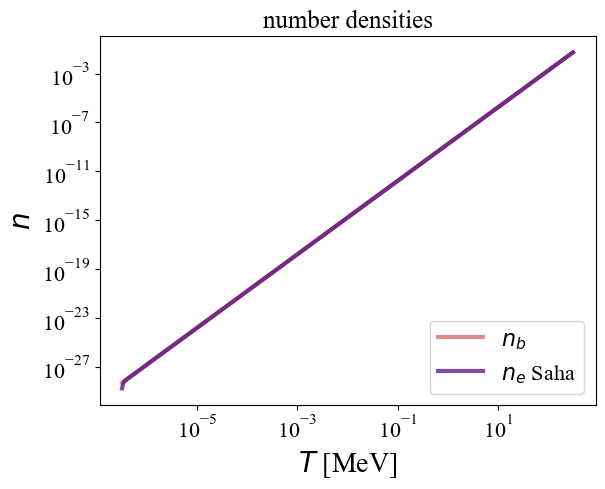

In [ ]:
f, ax = plt.subplots()

ax.loglog(Tlist, [nb(i) for i in Tlist],lw=3,c='indianred',alpha = 0.7,label = '$n_b$')
ax.loglog(Tlist, [ne_total(i) for i in Tlist],lw=3,c='indigo',alpha = 0.7,label = '$n_e$ Saha')

ax.set_ylabel(r'$n$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'number densities', fontsize=18)
#ax.set_xlim([20,0.1])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(loc='lower right',fontsize=16)

## Chemical Potential

In [5]:
def mu_e(T):
    if T < (0.0018):
        return me + (0.5030347810001615-me)*(T/0.0018)
    else:
        return fsolve(lambda mu: -2*eta*RZetaThree/np.pi**2+(me*T/(2*np.pi))**(3/2)*np.exp(-me/T)*np.sinh(mu/T),1)[0]

def mu_e_version2(T):
    if T > 0.022:
        return 0
    if T <= (10**(-6.5)):
        return me + (0.5109871506712876-me)*(T/10**(-6.5))
    else:
        return T*np.log((ne_total(T)*np.sqrt(2*np.pi**3))/((me*T)**(3/2)*(1+(15*T)/(8*me))))+me

def mu_e_original(T):
	# first method
    if T > 0.015:
        return 0
    elif T <= 0.32 * 10**(-6):
        return me + (0.5109878638043043 - me) * (T / (0.32 * 10**(-6)))
    else:
        return me + T * np.log2(nb(T)/2 * (2*np.pi/(me*T))**(3/2))

def ne_zero(T):
    return 2* (me * T / (2*np.pi))**(3/2) * np.exp(-me/T)

def mu_e_lit(T):
	# literature method
    if T > 0.022:
        return 0
    elif T <= 0.0007:
        return me + (0.48445207191558337 - me) * (T / (0.0007))
    else:
        return T*(np.log(ne_total(T))-np.log(ne_zero(T)))

Tlist = np.logspace(2.5, -5.5, num=10000)
ufull_list = np.array([mu_e(i) for i in Tlist])
u_e = interp1d(Tlist, ufull_list)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


## Merging Expressions

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


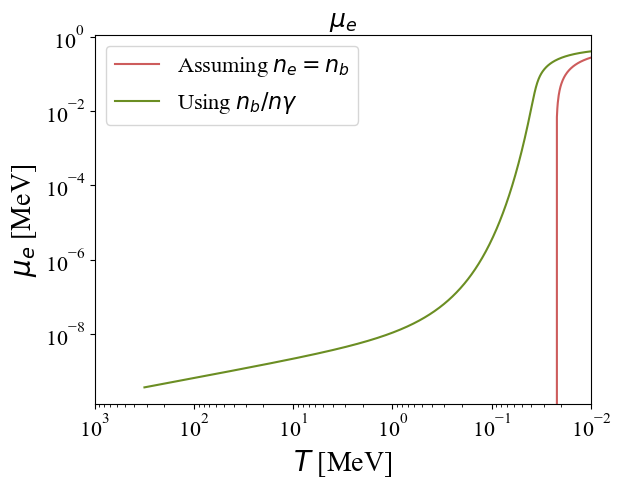

In [ ]:
Tlist = np.logspace(2.5,-2,num=1000)
f, ax = plt.subplots()
ax.loglog(Tlist,np.array([mu_e_version2(i) for i in Tlist]),label = 'Assuming $n_e = n_b$',color = 'indianred')
ax.loglog(Tlist,np.array([mu_e_nonrelative(i) for i in Tlist]),label = 'Using $n_b/n\gamma$',color ='olivedrab')
ax.set_ylabel(r'$\mu_e$ [MeV]', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$\mu_e$', fontsize=18)
ax.set_xlim([1000,0.01])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(loc='upper left',fontsize=16)

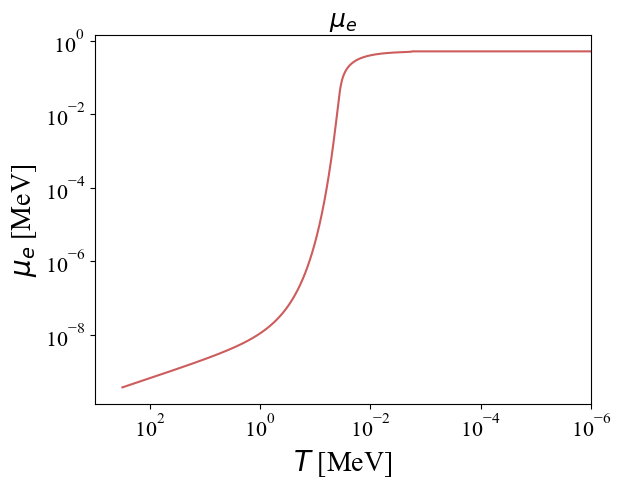

In [ ]:
Tlist = np.logspace(2.5,-6,num=1000)
f, ax = plt.subplots()
ax.loglog(Tlist,np.array([mu_e(i) for i in Tlist]),label = 'Assuming $n_e = n_b$',color = 'indianred')
#ax.loglog(Tlist,np.array([mu_e_nonrelative(i) for i in Tlist]),label = 'Using $n_b/n\gamma$',color ='olivedrab')
ax.set_ylabel(r'$\mu_e$ [MeV]', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$\mu_e$', fontsize=18)
ax.set_xlim([1000,0.000001])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
#ax.legend(loc='upper left',fontsize=16)

## General Plotting

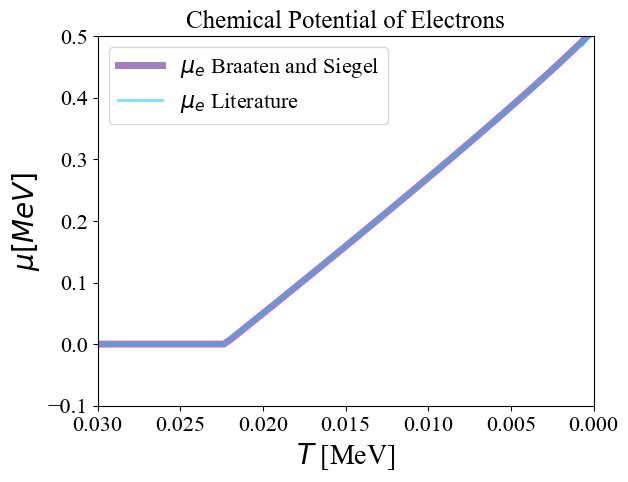

In [ ]:
Tlist1 = np.logspace(1,-6.5,num=1000)
f, ax = plt.subplots()

ax.plot(Tlist1, [mu_e_version2(i) for i in Tlist1],lw=5,c='indigo',alpha = 0.5,label = '$\mu_e$ Braaten and Siegel')
#ax.plot(Tlist1, [mu_e_original(i) for i in Tlist1],lw=3,c='indigo',alpha = 0.7,label = '$\mu_e$ Original Method')
ax.plot(Tlist1, [mu_e_lit(i) for i in Tlist1],lw=2,c='deepskyblue',alpha = 0.5,label = '$\mu_e$ Literature')
#plt.axvline(x=0.3*10**(-6), color='k', linestyle='--', linewidth=0.8, label = "Recombination")

ax.set_ylabel(r'$\mu [MeV]$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'Chemical Potential of Electrons', fontsize=18)
ax.set_xlim([0.03,0])
ax.set_ylim([-0.1, 0.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(loc='upper left',fontsize=16)


## Testing

In [6]:
def n_e(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda y: \
    2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
    return integral[0]

def n_e1(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda y: \
    2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y)+1), me/T, np.inf)
    return integral[0]

def p_e(T):
    """
    pressure density of electron
    """
    integral= scipy.integrate.quad(lambda y: \
    2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
    return integral[0]

def rho_e(T):
    """
    energy density of electrons
    """

    integral= scipy.integrate.quad(lambda y: \
    2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
    return integral[0]

def s_e(T):
    """
    entropy density of electron
    """
    return (p_e(T)+rho_e(T))/T

In [7]:
def mu_e(T):
    if T <= (0.0018):
        return me + (0.5030347810001615-me)*(T/0.0018)
    else:
        return fsolve(lambda mu: -2*eta*RZetaThree/np.pi**2+(me*T/(2*np.pi))**(3/2)*np.exp(-me/T)*np.sinh(mu/T),1)[0]


Tlist = np.logspace(2.5, -5.5, num=10000)
ufull_list = np.array([mu_e(i) for i in Tlist])
u_e = interp1d(Tlist, ufull_list)
#print(mu_e(0.0018))

In [13]:
Tlist = np.logspace(2.5,-5.5, num = 1000)
ne = np.array([n_e(i) for i in Tlist])

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_11228/2169904378.py:6: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)


In [9]:
pe = np.array([p_e(i) for i in Tlist])

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_11228/2169904378.py:22: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)


In [10]:
rhoe = np.array([rho_e(i) for i in Tlist])

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_11228/2169904378.py:31: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)


/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_1519/2169904378.py:6: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_1519/2169904378.py:14: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y)+1), me/T, np.inf)


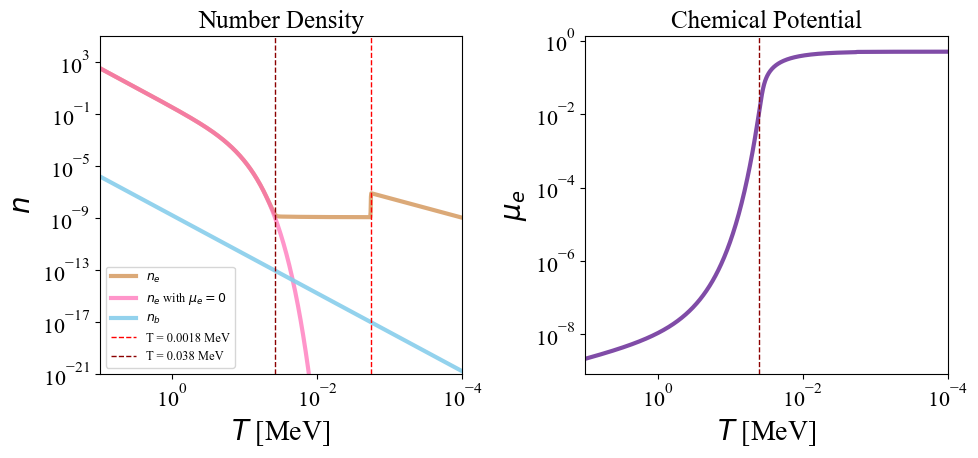

In [ ]:
Tlist = np.logspace(1,-4,num=1000)
f, ax = plt.subplots(1,2)
f.set_figwidth(10)

ax[0].loglog(Tlist, [n_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = '$n_e$')
ax[0].loglog(Tlist, [n_e1(i) for i in Tlist],lw=3,c='hotpink',alpha = 0.7,label = r'$n_e$ with $\mu_e = 0$')
ax[0].loglog(Tlist, [nb(i) for i in Tlist],lw=3,c='skyblue',alpha = 0.9, label = '$n_b$')
ax[1].loglog(Tlist, [mu_e(i) for i in Tlist],lw=3,c='indigo',alpha = 0.7,label = 'with $\mu_e$')
#ax[0][0].loglog(Tlist, [irr.rho_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0].axvline(x=0.001775, color='red', linestyle='--', linewidth=1, label = "T = 0.0018 MeV")
ax[0].axvline(x=0.038, color='darkred', linestyle='--', linewidth=1, label = "T = 0.038 MeV")

ax[0].set_ylabel(r'$n$', fontsize=20)
ax[0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0].set_title(r'Number Density', fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)
ax[0].set_xlim([10,0.0001])
ax[0].set_ylim([0.000000000000000000001,100000])

ax[1].set_ylabel(r'$\mu_e$', fontsize=20)
ax[1].set_xlabel(r'$T$ [MeV]', fontsize=20)
#ax[1].set_xlim([0.05,0.03])
ax[1].set_xlim([10,0.0001])
#ax[1].axvline(x=0.04, color='k', linestyle='--', linewidth=0.8, label = "T = 0.001775 MeV")
#ax[1].axvline(x=0.001775, color='k', linestyle='--', linewidth=0.8, label = "T = 0.001775 MeV")
ax[1].axvline(x=0.04, color='darkred', linestyle='--', linewidth=1, label = "T = 0.001775 MeV")
ax[1].set_title(r'Chemical Potential', fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)
ax[0].legend(loc='lower left',fontsize=9)
plt.tight_layout()


/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_1519/445905103.py:23: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_1519/445905103.py:6: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_1519/445905103.py:14: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-u_e(T)/T)+1), me/T, np.inf)


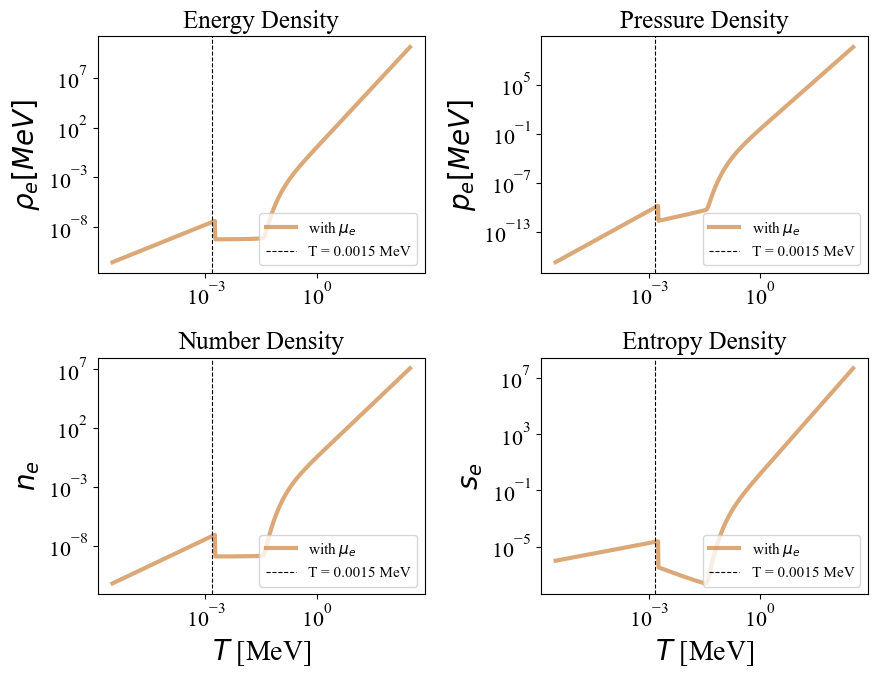

In [ ]:
Tlist = np.logspace(2.5,-5.5,num=1000)
f, ax = plt.subplots(2,2)
f.set_figwidth(9)
f.set_figheight(7)

ax[0][0].loglog(Tlist, [rho_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[0][0].loglog(Tlist, [irr.rho_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][0].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")

ax[0][0].set_ylabel(r'$\rho_e [MeV]$', fontsize=20)
#ax[0][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][0].set_title(r'Energy Density', fontsize=18)
ax[0][0].xaxis.set_tick_params(labelsize=16)
ax[0][0].yaxis.set_tick_params(labelsize=16)

ax[0][0].legend(loc='lower right',fontsize=11)

ax[1][0].loglog(Tlist, [n_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[1][0].loglog(Tlist, [irr.n_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][0].set_ylabel(r'$n_e$', fontsize=20)
ax[1][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][0].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[1][0].set_title(r'Number Density', fontsize=18)
ax[1][0].xaxis.set_tick_params(labelsize=16)
ax[1][0].yaxis.set_tick_params(labelsize=16)

ax[1][0].legend(loc='lower right',fontsize=11)


ax[0][1].loglog(Tlist, [p_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[0][1].loglog(Tlist, [irr.p_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][1].set_ylabel(r'$p_e [MeV]$', fontsize=20)
#ax[0][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][1].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[0][1].set_title(r'Pressure Density', fontsize=18)
ax[0][1].xaxis.set_tick_params(labelsize=16)
ax[0][1].yaxis.set_tick_params(labelsize=16)

ax[0][1].legend(loc='lower right',fontsize=11)

ax[1][1].loglog(Tlist, [s_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[1][1].loglog(Tlist, [irr.s_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][1].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[1][1].set_ylabel(r'$s_e$', fontsize=20)
ax[1][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][1].set_title(r'Entropy Density', fontsize=18)
ax[1][1].xaxis.set_tick_params(labelsize=16)
ax[1][1].yaxis.set_tick_params(labelsize=16)

ax[1][1].legend(loc='lower right',fontsize=11)
plt.tight_layout()
plt.show()